In [137]:
import json
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)

from dtw import dtw
# import mlpy

Populating the interactive namespace from numpy and matplotlib


/usr/local/linux/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['dist', 'rate']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [19]:
def get_data(data):
    '''
    helper function to get the timestamp and 3-component acceleration data. 
    '''
    # read in x, y, z data
    x = data['data']['x']
    y = data['data']['y']
    z = data['data']['z']

    # calculate the timestamp
    # get the start time
    t0 = data['header']['starttime']
    npoints = len(x)
    sampling_rate = data['header']['sampling_rate']
    
    # get the end time 
    t1 = t0 + npoints / sampling_rate
    
    # form the timestamp
    t = [t0 + tmp/sampling_rate for tmp in range(0, npoints)]
    
    # station latitude and long
    return t, x, y, z

def plot_data(t, x, y, z):
    '''
    helper function to plot the 3-component acceleration data
    '''
    figure(num=None, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.subplot(311)
    plt.plot(t, x)
    plt.subplot(312)
    plt.plot(t, y)
    plt.ylabel('Acceleration (g)')
    plt.subplot(313)
    plt.plot(t, z)
    plt.xlabel('Time (sec)')
    plt.show()

In [20]:
import os
cwd = os.getcwd()
print (cwd)

/accounts/grad/jorothy_gong/MyShakeAnalysis/code/Yun


## Read simulated data

1625 1625 25.0


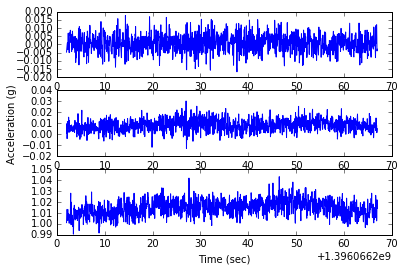

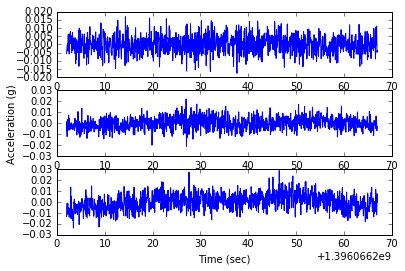

In [129]:
data = json.load(open('../../data/EQ/simulated/12951_M5.1_1396066202.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
#print(data['header'])
print (len(x), len(t), rate)
plot_data(t, x, y, z)

x, y, z = Normalize_Seq(x, y, z)
plot_data(t, x, y, z)

## Read shake table data

984 984 25.0


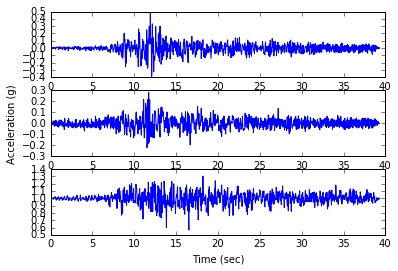

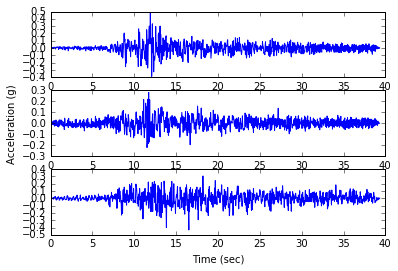

In [133]:
data = json.load(open('../../data/EQ/shake_table/trial142_phone2.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print (len(x), len(t), rate)
plot_data(t, x, y, z)
# from matplotlib.pyplot import specgram
# specgram(z, NFFT=100, Fs=rate, noverlap = 50);

x, y, z = Normalize_Seq(x, y, z)
plot_data(t, x, y, z)

## Read human data

6284 6284 25.0


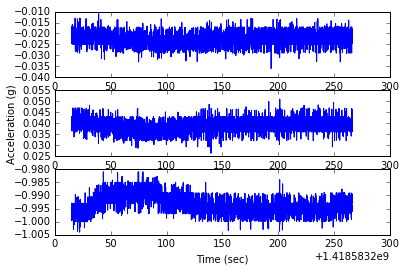

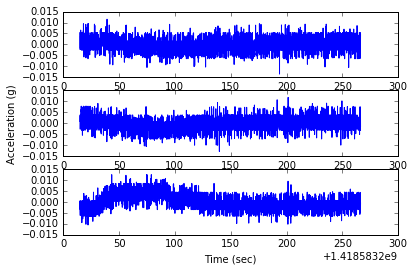

In [135]:
data = json.load(open('../../data/Human/013306004148017_1418583215.json', 'r'))

t, x, y, z = get_data(data)
rate = data['header']['sampling_rate'];
print (len(x), len(t), rate)
plot_data(t, x, y, z)

x, y, z = Normalize_Seq(x, y, z)
plot_data(t, x, y, z)

## Dynamic Time Warping

In [53]:
def Normalize_Seq(seq_x = None, seq_y = None, seq_z = None, dim = 3):
    """
    May need further normalization later.
    Take either 1-dim accelaretion sequence or 3-dim, or 2-idm.
    """
    tmp = []
    if seq_x != None:
        seq_x = seq_x - np.mean(seq_x)
        tmp.append(seq_x)
    if seq_y != None:
        seq_y = seq_y - np.mean(seq_y)
        tmp.append(seq_y)
    if seq_z != None:
        seq_z = seq_z - np.mean(seq_z)
        tmp.append(seq_z)
        
    if dim != 3:
        return tmp
    else:
        return seq_x, seq_y, seq_z

In [130]:
def MyDistance(x, y):
    return (x * x) + (y * y)

dist, cost, acc, path = dtw(x, y, dist = MyDistance)

def Cal_DTW(x, y, fun = None):
    #print('ha')
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y).reshape(-1, 1)
    if fun == None:
        dist, cost, acc, path = dtw(x, y, dist = lambda x, y: norm(x - y, ord=1))
    else:
        dist, cost, acc, path = dtw(x, y, dist = fun)
        
    return dist

In [131]:
# Cal_DTW_Compare
def DTW_Self(seq, window = 2, interval = 0.5, gap = 1/5, rate = 25):
    """
    Now sequence is only 1-dim accelaration sequence.
    Add if sequence length < 5 seconds
    """
    seq = seq - np.mean(seq)
    seq_len = len(seq)
    seq_win = int(window * rate)
    seq_int = int(interval * rate)
    compute_gap = int(gap * rate)
    return [Cal_DTW(seq[i : (i + seq_win)], seq[(i + seq_int) : (i + seq_win + seq_int)]) 
            for i in range(0, seq_len - seq_win - seq_int, compute_gap)]
 

simulated


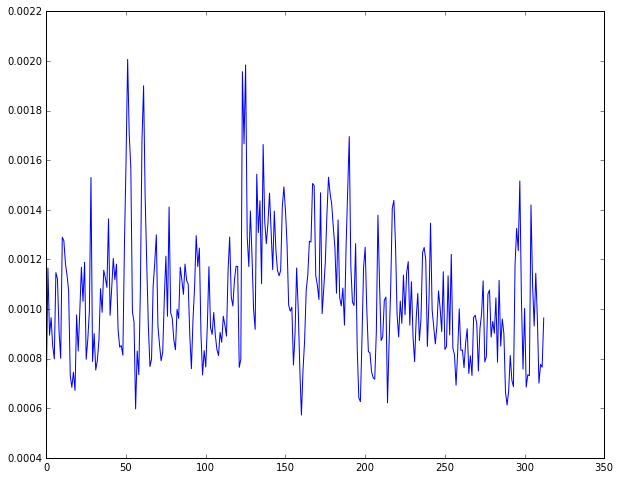

In [132]:
print("simulated")
plot(DTW_Self(x))

shake


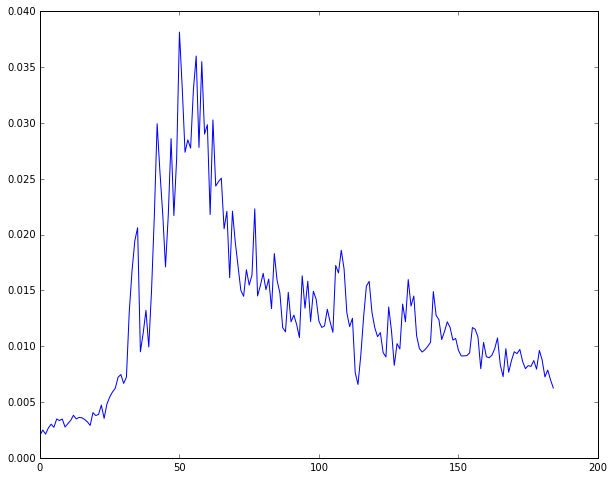

In [134]:
print('shake')
plot(DTW_Self(x))

human


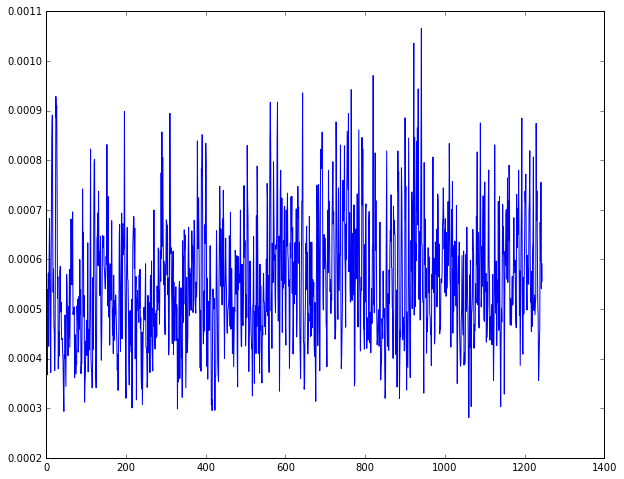

In [136]:
print("human")
plot(DTW_Self(x))

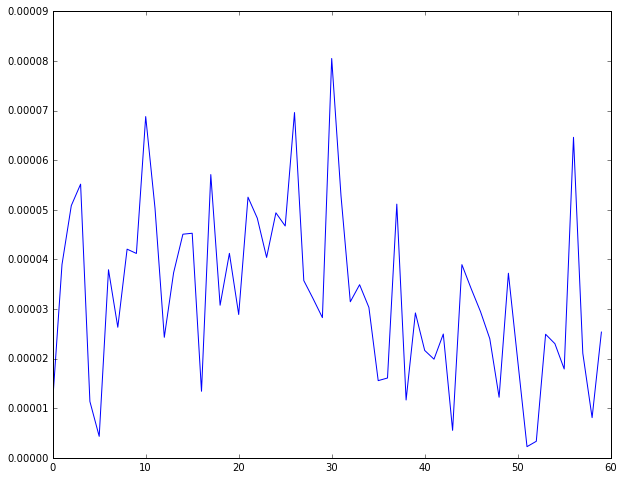

In [121]:
print("simulated")
plot(DTW_Self(x))

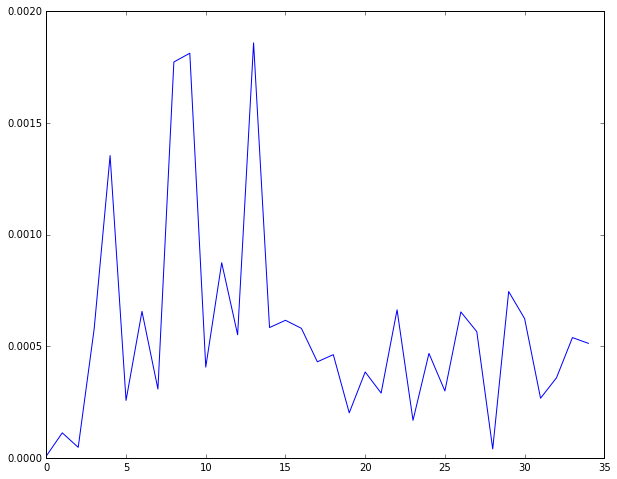

In [119]:
print('shake')
plot(DTW_Self(x))

human


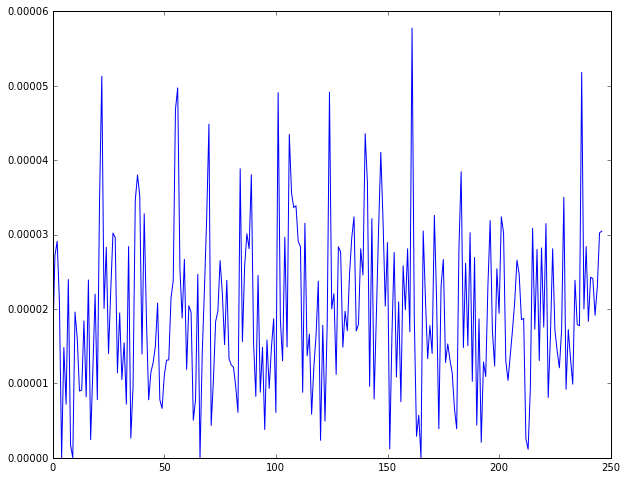

In [123]:
print("human")
plot(DTW_Self(x))

6284 6284 25.0


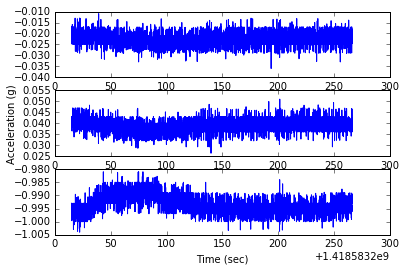

In [35]:
data_human = json.load(open('../../data/Human/013306004148017_1418583215.json', 'r'))

t_human, x_human, y_human, z_human = get_data(data_human)
rate_human = data_human['header']['sampling_rate'];
print (len(x_human), len(t_human), rate_human)
plot_data(t_human, x_human, y_human, z_human)

984 984 25.0


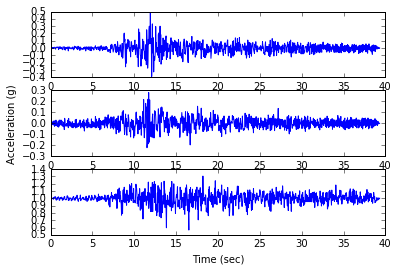

In [36]:
data_table = json.load(open('../../data/EQ/shake_table/trial142_phone2.json', 'r'))

t_table, x_table, y_table, z_table = get_data(data_table)
rate_table = data_table['header']['sampling_rate'];
print (len(x_table), len(t_table), rate_table)
plot_data(t_table, x_table, y_table, z_table)
# from matplotlib.pyplot import specgram
# specgram(z, NFFT=100, Fs=rate, noverlap = 50);

1625 1625 25.0


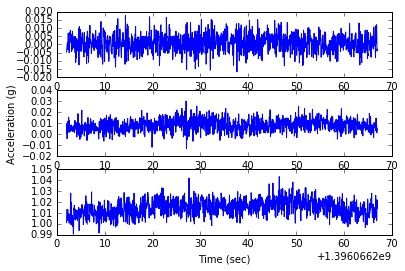

In [84]:
data_simu = json.load(open('../../data/EQ/simulated/12951_M5.1_1396066202.json', 'r'))

t_simu, x_simu, y_simu, z_simu = get_data(data_simu)
rate_simu = data_simu['header']['sampling_rate'];
#print(data['header'])
print (len(x_simu), len(t_simu), rate_simu)
plot_data(t_simu, x_simu, y_simu, z_simu)

In [76]:
def MyDistance(x, y):
    return (x * x) + (y * y)

dist, cost, acc, path = dtw(x, y, dist = MyDistance)

In [81]:

def CalculateDRW(x, y, fun = None):
    x = np.asarray(x).reshape(-1, 1)
    y = np.asarray(y).reshape(-1, 1)
    if fun == None:
        dist, cost, acc, path = dtw(x, y, dist = lambda x, y: norm(x - y, ord=1))
    else:
        dist, cost, acc, path = dtw(x, y, dist = fun)
        
    return dist, cost, acc, path

## Human v.s. Shake_table

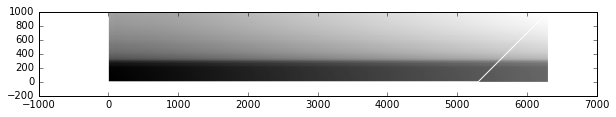

In [98]:
dist, cost, acc, path = CalculateDRW(x = x_human, y = x_table, fun = MyDistance)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
# xlim((-0.5, acc.shape[0]-0.5))
# ylim((-0.5, acc.shape[1]-0.5))

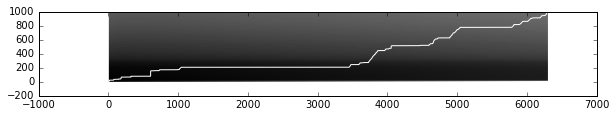

In [96]:
dist, cost, acc, path = CalculateDRW(x = x_human, y = x_table)
print(dist)


imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

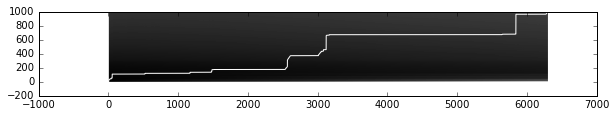

In [99]:
dist, cost, acc, path = CalculateDRW(x = y_human, y = y_table)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

1.40647875856


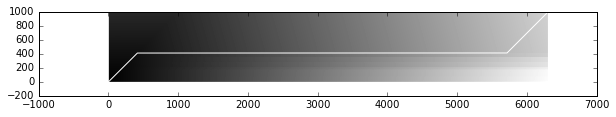

In [107]:
dist, cost, acc, path = CalculateDRW(x = z_human, y = z_table)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

## Human v.s. Simulation

0.00760836490818


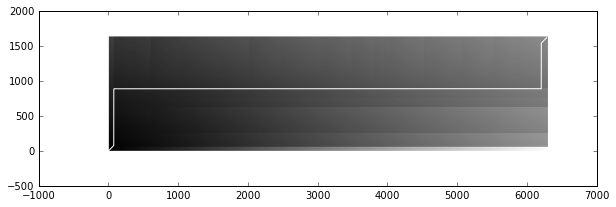

In [104]:
dist, cost, acc, path = CalculateDRW(x = x_human, y = x_simu)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

0.0115690355173


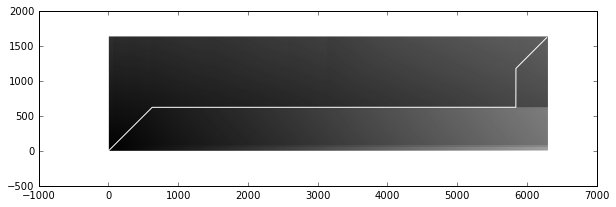

In [105]:
dist, cost, acc, path = CalculateDRW(x = y_human, y = y_simu)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

1.58136815619


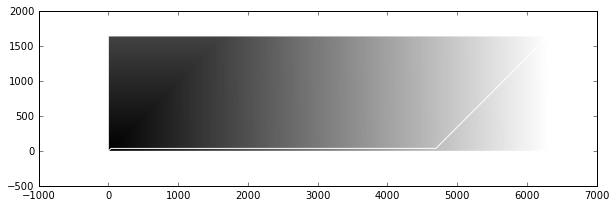

In [106]:
dist, cost, acc, path = CalculateDRW(x = z_human, y = z_simu)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

## Human v.s. Human

2614 2614 25.0


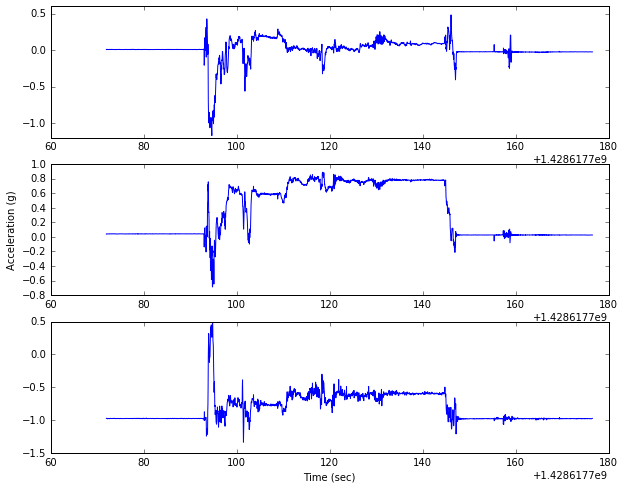

In [108]:
data_human2 = json.load(open('../../data/Human/353683062130055_1428617772.json', 'r'))

t_human2, x_human2, y_human2, z_human2 = get_data(data_human2)
rate_human2 = data_human2['header']['sampling_rate'];
print (len(x_human2), len(t_human2), rate_human2)
plot_data(t_human2, x_human2, y_human2, z_human2)

0.0230750438951


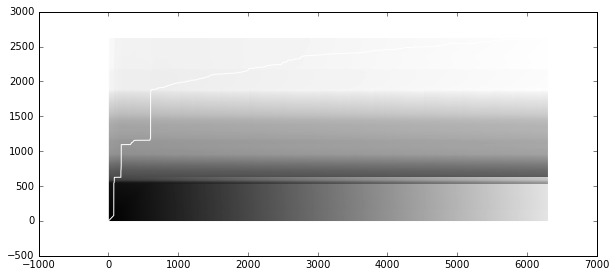

In [109]:
dist, cost, acc, path = CalculateDRW(x = x_human, y = x_human2)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

0.0928744458494


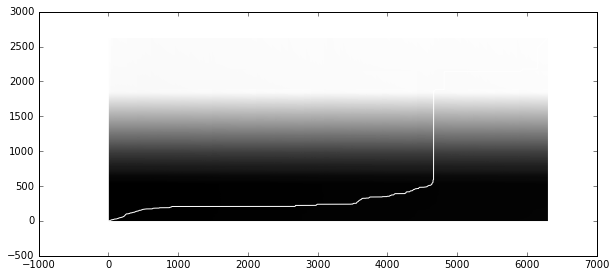

In [110]:
dist, cost, acc, path = CalculateDRW(x = y_human, y = y_human2)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

0.0516918792283


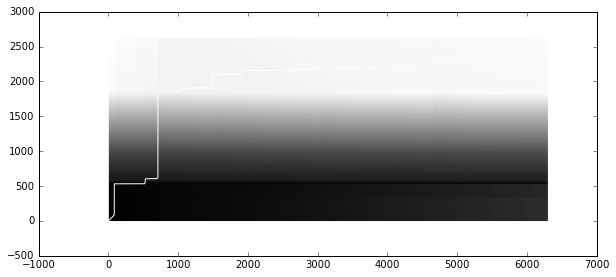

In [111]:
dist, cost, acc, path = CalculateDRW(x = z_human, y = z_human2)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

## Simulation v.s. Simulation

6474 6474 25.0


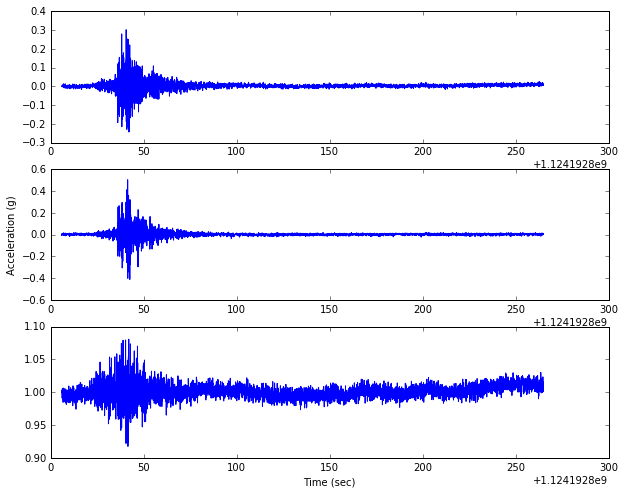

In [112]:
data_simu2 = json.load(open('../../data/EQ/simulated/MYG004_M7.2_1124192806.json', 'r'))

t_simu2, x_simu2, y_simu2, z_simu2 = get_data(data_simu2)
rate_simu2 = data_simu2['header']['sampling_rate'];
#print(data['header'])
print (len(x_simu2), len(t_simu2), rate_simu2)
plot_data(t_simu2, x_simu2, y_simu2, z_simu2)

0.00669429467848


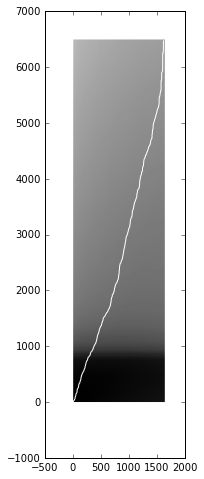

In [113]:
dist, cost, acc, path = CalculateDRW(x = x_simu, y = x_simu2)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

0.00866401791568


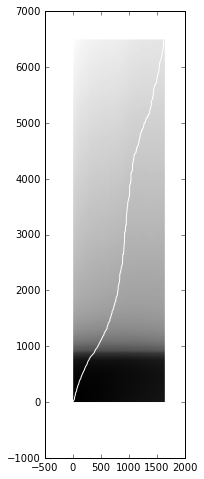

In [114]:
dist, cost, acc, path = CalculateDRW(x = y_simu, y = y_simu2)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

0.00529463750549


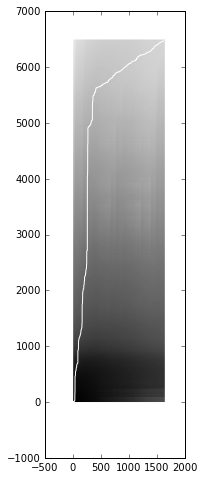

In [115]:
dist, cost, acc, path = CalculateDRW(x = z_simu, y = z_simu2)
print(dist)

imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')